In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('df_train_ATM.csv')
df2 = pd.read_csv('df_test_ATM.csv')

In [3]:
# Identify commuters and non-commuters
commuter_df = df1.groupby('id')['purpose'].apply(lambda x: 2 in x.values).reset_index()
commuter_df['commuter'] = commuter_df['purpose'].map({True: 1, False: 0})
df1 = pd.merge(df1, commuter_df[['id', 'commuter']], on='id', how='left')
df_C = df1[df1['commuter']==1].copy()
df_NC = df1[df1['commuter']==0].copy()
df_C_NW = df_C[df_C['purpose']!=2]

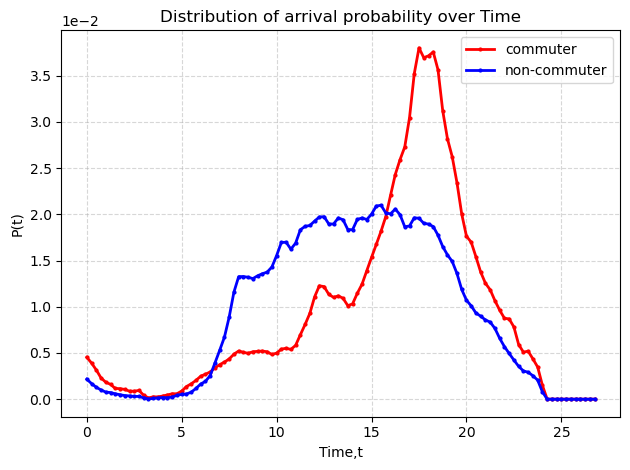

,time,prob,hour
0,0,0.002165,0.00
1,1,0.001686,0.25
2,2,0.001289,0.50
3,3,0.000996,0.75
4,4,0.000764,1.00
...,...,...,...
103,103,0.000000,25.75
104,104,0.000000,26.00
105,105,0.000000,26.25
106,106,0.000000,26.50


In [5]:
def average_hourly_prob(df):

    prob = pd.DataFrame({'time': list(range(0, 108)),'prob': [0] * 108})
    
    # 计算每个时间点的概率
    df_0 = df.copy()
    df_0 = df_0[df_0['arr_time']!=12]
    P = df_0['arr_time'].value_counts()/len(df)

    for index, value in prob.iterrows():
        if index in P.index:
            prob.at[index, 'prob'] = P[index]

    for five_min in range(0,108):
        if five_min in prob.index:
            five_min_prob = prob.at[five_min, 'prob']
            average_hour_prob = prob.iloc[max(0, five_min-2):min(five_min+2, 107), 1].mean()
            if five_min_prob > average_hour_prob:
                extra_prob = five_min_prob - average_hour_prob
                average_extra_prob = extra_prob / 24
                for i in range(-2, 2):
                    if 13 <= five_min + i < 107:
                        prob.at[five_min + i, 'prob'] += average_extra_prob
                prob.at[five_min, 'prob'] = average_hour_prob
    return prob

P_C = average_hourly_prob(df_C_NW)
P_NC = average_hourly_prob(df_NC)

def smooth_and_normalize(prob, window_size=2):
    # 对概率应用滑动平均
    prob_smooth = prob['prob'].rolling(window=window_size, min_periods=1, center=True).mean()

    # 归一化概率，以确保所有概率之和为1
    prob_smooth = prob_smooth / prob_smooth.sum()

    return prob_smooth

# 对原始概率应用平滑和归一化
P_C['prob'] = smooth_and_normalize(P_C)
P_NC['prob'] = smooth_and_normalize(P_NC)

P_C.to_csv('Pt_commuter.csv',index = False)
P_NC.to_csv('Pt_non_commuter.csv',index = False)

P_C['hour'] = P_C['time'] / 4
P_NC['hour'] = P_NC['time'] / 4

# Plot the distribution
plt.plot(P_C['hour'], P_C['prob'], color='red', linewidth=2, marker='o', markersize=2, label='commuter')
plt.plot(P_NC['hour'], P_NC['prob'], color='blue', linewidth=2, marker='o', markersize=2, label='non-commuter')

plt.xlabel('Time,t')
plt.ylabel('P(t)')
plt.title('Distribution of arrival probability over Time')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2, 2))
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

P_NC

In [6]:
P_NC.to_csv('Pt_non_commuter',index = False)
P_C.to_csv('Pt_commuter',index = False)

In [7]:
df_NC

,id,purpose,arr_time,dep_time,gender,education,driver_license,X_transit_pass,employment,X_student,next_purpose,new_next_purpose,predicted_next_purpose,commuter
0,10320361,1,12,33,1,6,1,0,1,0,22,others,2,0
1,10320361,22,34,62,1,6,1,0,1,0,1,1,1,0
2,10320361,1,63,66,1,6,1,0,1,0,15,others,17,0
3,10320361,15,67,70,1,6,1,0,1,0,15,others,12,0
4,10320361,15,71,74,1,6,1,0,1,0,1,1,19,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170397,72119444,20,40,47,2,1,0,0,0,0,1,1,25,0
170398,72119444,1,54,107,2,1,0,0,0,0,None,None,None,0
170399,72120271,1,26,34,2,2,1,0,1,0,20,others,15,0
170400,72120271,20,35,60,2,2,1,0,1,0,1,1,1,0


In [8]:
df_C

,id,purpose,arr_time,dep_time,gender,education,driver_license,X_transit_pass,employment,X_student,next_purpose,new_next_purpose,predicted_next_purpose,commuter
60,10351982,1,12,24,1,3,1,0,1,0,2,2&3,21,1
61,10351982,2,25,58,1,3,1,0,1,0,3,2&3,1,1
62,10351982,3,67,77,1,3,1,0,1,0,1,1,1,1
63,10351982,1,78,107,1,3,1,0,1,0,None,None,None,1
69,10353643,1,12,27,2,5,1,1,1,0,2,2&3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170380,72119122,1,12,38,1,4,1,0,1,0,23,others,2,1
170381,72119122,23,39,44,1,4,1,0,1,0,1,1,2,1
170382,72119122,1,46,52,1,4,1,0,1,0,2,2&3,25,1
170383,72119122,2,54,91,1,4,1,0,1,0,1,1,1,1


In [9]:
df_C_NW

,id,purpose,arr_time,dep_time,gender,education,driver_license,X_transit_pass,employment,X_student,next_purpose,new_next_purpose,predicted_next_purpose,commuter
60,10351982,1,12,24,1,3,1,0,1,0,2,2&3,21,1
62,10351982,3,67,77,1,3,1,0,1,0,1,1,1,1
63,10351982,1,78,107,1,3,1,0,1,0,None,None,None,1
69,10353643,1,12,27,2,5,1,1,1,0,2,2&3,2,1
71,10353643,19,71,75,2,5,1,1,1,0,1,1,26,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170360,72115231,1,59,107,1,6,1,0,1,0,None,None,None,1
170380,72119122,1,12,38,1,4,1,0,1,0,23,others,2,1
170381,72119122,23,39,44,1,4,1,0,1,0,1,1,2,1
170382,72119122,1,46,52,1,4,1,0,1,0,2,2&3,25,1


In [13]:
# Identify commuters and non-commuters
df1 = df2
commuter_df = df1.groupby('id')['purpose'].apply(lambda x: 2 in x.values).reset_index()
commuter_df['commuter'] = commuter_df['purpose'].map({True: 1, False: 0})
df1 = pd.merge(df1, commuter_df[['id', 'commuter']], on='id', how='left')
df_C = df1[df1['commuter']==1].copy()
df_NC = df1[df1['commuter']==0].copy()
df_C_NW = df_C[df_C['purpose']!=2]

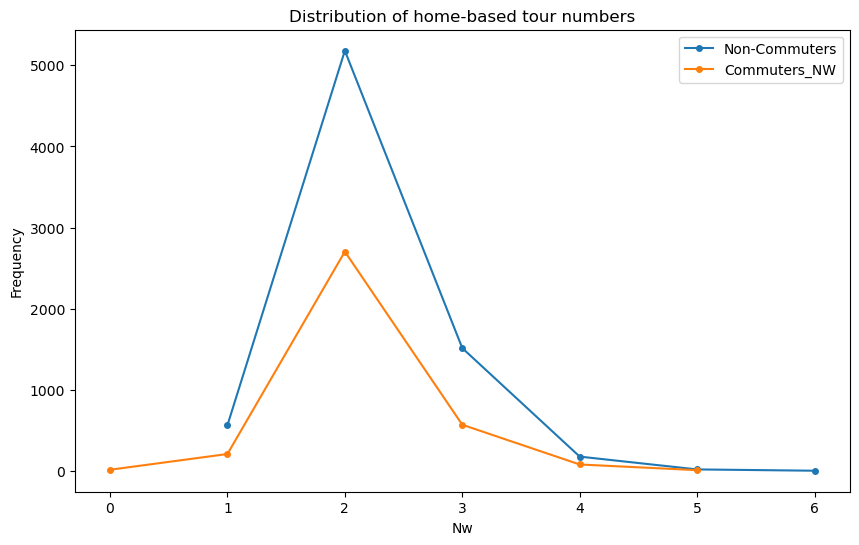

In [14]:
# parameters for person (Non-commuters + commuters)
Param_NC = df_NC[df_NC['purpose'] == 1].groupby('id').size().reset_index(name='Nw')
Param_C_NW = df_C_NW[df_C_NW['purpose'] == 1].groupby('id').size().reset_index(name='Nw')
all_persons = df_C['id'].unique()
df_all = pd.DataFrame({'id': all_persons, 'Nw': [0]*len(all_persons)})
df_final = pd.merge(df_all, Param_C_NW, how='left', on='id')
df_final['Nw'] = df_final['Nw_y'].fillna(df_final['Nw_x'])
df_final = df_final.drop(['Nw_x', 'Nw_y'], axis=1)
Param_C_NW = df_final
import matplotlib.pyplot as plt

# Get the value counts for both dataframes
nc_counts = Param_NC['Nw'].value_counts().sort_index()
c_nw_counts = Param_C_NW['Nw'].value_counts().sort_index()

# Create a new figure and set the size of the figure
plt.figure(figsize=(10, 6))

# Plot the distributions
plt.plot(nc_counts.index, nc_counts.values, marker='o', markersize=4, label='Non-Commuters')
plt.plot(c_nw_counts.index, c_nw_counts.values, marker='o', markersize=4, label='Commuters_NW')

# Set labels and title
plt.xlabel('Nw')
plt.ylabel('Frequency')
plt.title('Distribution of home-based tour numbers')

# Display legend
plt.legend()

# Show the plot
plt.show()

In [15]:
Param_NC['Nw'] = Param_NC['Nw'].apply(lambda x: max(x-1, 0))
Param_C_NW['Nw'] = Param_C_NW['Nw'].apply(lambda x: max(x-1, 0))


Param_NC.to_csv('person_non_commuter.csv', index=False)
Param_C_NW.to_csv('person_commuter.csv', index=False)

In [23]:
df_NC

,id,purpose,arr_time,dep_time,gender,education,driver_license,X_transit_pass,employment,X_student,next_purpose,predicted_next_purpose,commuter
0,10319851,1,12,32,1,6,1,0,0,0,25,15,0
1,10319851,25,36,51,1,6,1,0,0,0,1,18,0
2,10319851,1,52,68,1,6,1,0,0,0,None,21,0
3,10319852,1,12,37,2,6,1,0,0,0,21,2,0
4,10319852,21,37,42,2,6,1,0,0,0,1,20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42496,72117985,15,50,56,1,1,0,0,0,0,25,22,0
42497,72117985,25,61,107,1,1,0,0,0,0,None,1,0
42498,72119121,1,12,38,2,3,1,0,0,0,23,22,0
42499,72119121,23,39,44,2,3,1,0,0,0,1,20,0


In [17]:
df_C_NW.to_csv('activity_commuter.csv',index = False)
df_NC.to_csv('activity_non_commuter.csv',index = False)

In [22]:
df_C

,id,purpose,arr_time,dep_time,gender,education,driver_license,X_transit_pass,employment,X_student,next_purpose,predicted_next_purpose,commuter
29,10382323,1,12,82,2,2,0,0,1,0,2,None,1
30,10382323,2,84,107,2,2,0,0,1,0,None,1,1
34,10384283,1,12,30,1,2,0,0,1,0,2,2,1
35,10384283,2,31,68,1,2,0,0,1,0,1,1,1
36,10384283,1,69,84,1,2,0,0,1,0,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42493,72116904,2,27,62,1,1,1,0,1,0,1,5,1
42494,72116904,1,65,107,1,1,1,0,1,0,None,None,1
42501,72119712,1,12,66,1,6,1,0,1,0,2,13,1
42502,72119712,2,66,72,1,6,1,0,1,0,1,1,1


In [24]:
grouped = df_C_W.groupby('id').agg({'arr_time': 'first', 'dep_time': 'last'})
grouped.to_csv('work_time.csv')

In [25]:
grouped

,arr_time,dep_time
id,,
10382323,84,107
10384283,31,68
10420111,72,96
10436131,35,67
10454902,32,64
...,...,...
72113082,31,36
72115051,36,72
72115602,29,38
